In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hipposlam.utils import read_pickle


buffer  = read_pickle('data/StateMapLearner/AvoidanceReplayBuffer.pickle')
hipposlam = read_pickle('data/StateMapLearner/hipposlam.pickle')
hippomap = hipposlam['hippomap']
hipposeq = hipposlam['hipposeq']

In [2]:
data = np.vstack(buffer['traj'])

x = data[:, 0]
y = data[:, 1]
a = data[:, 2]
s = data[:, 3].astype(int)
xrang = [x.min(), x.max()]
yrang = [y.min(), y.max()]
unis = np.unique(s)

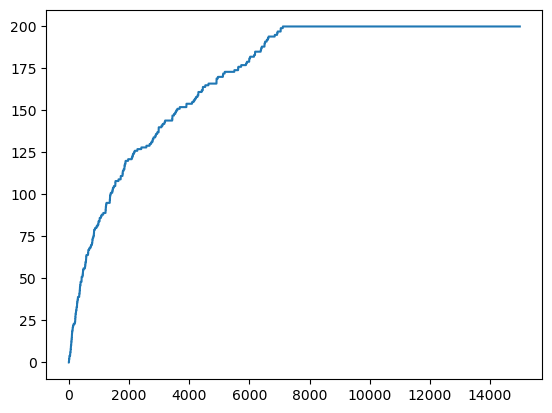

In [3]:
maxsid = 0
maxsid_list = []
for i in range(len(data)):
    stmp = data[i, 3]
    if maxsid < stmp:
        maxsid = stmp
    maxsid_list.append(maxsid)
plt.plot(maxsid_list)

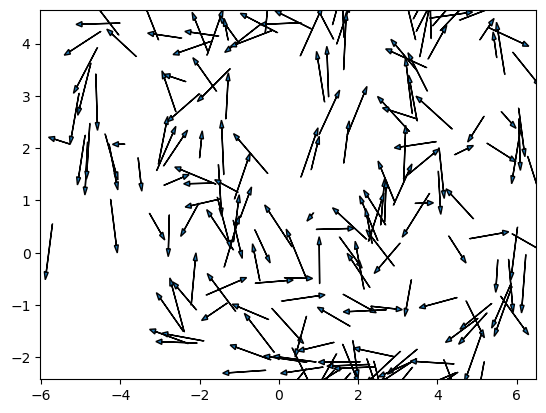

In [4]:
from pycircstat.descriptive import mean as cmean, resultant_vector_length
fig, ax = plt.subplots()
for s_each in unis:
    mask = s == s_each

    meanx = x[mask].mean()
    meany = y[mask].mean()
    meana = cmean(a[mask])
    r = resultant_vector_length(a[mask])

    ax.arrow(meanx, meany, np.cos(meana)*r, np.sin(meana)*r, head_width=0.1)
    ax.set_xlim(*xrang)
    ax.set_ylim(*yrang)


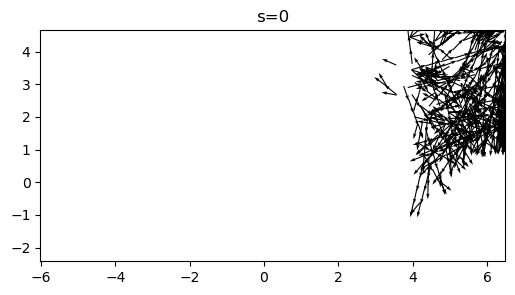

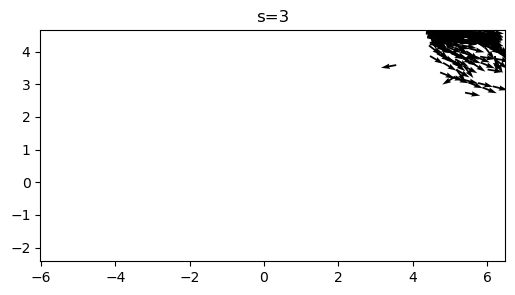

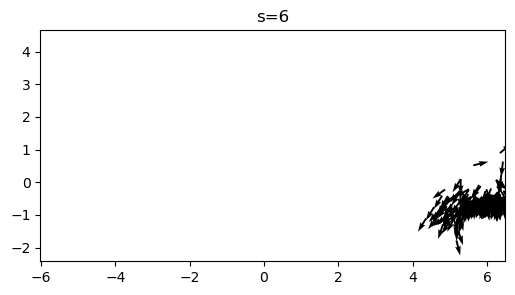

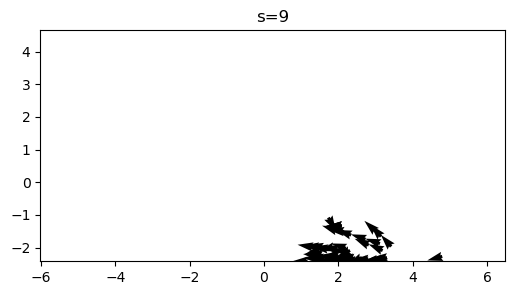

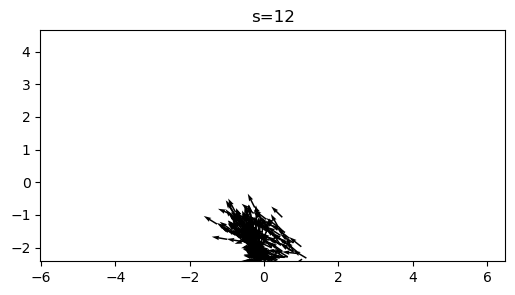

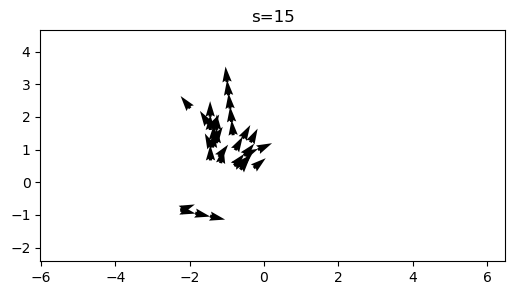

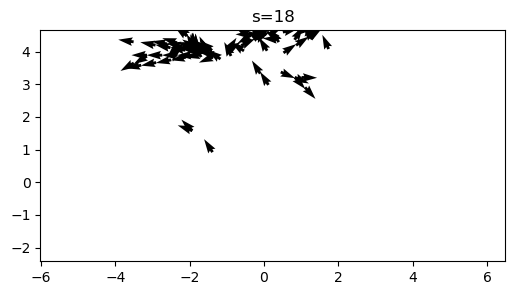

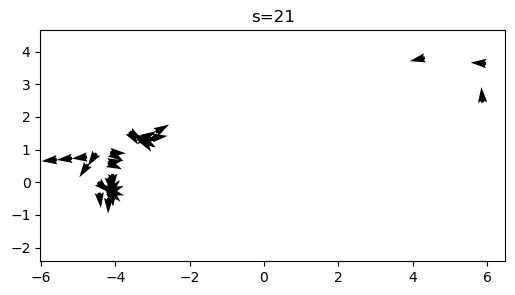

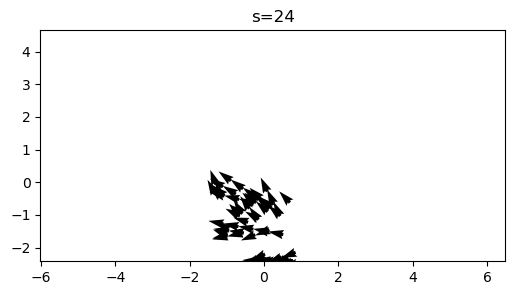

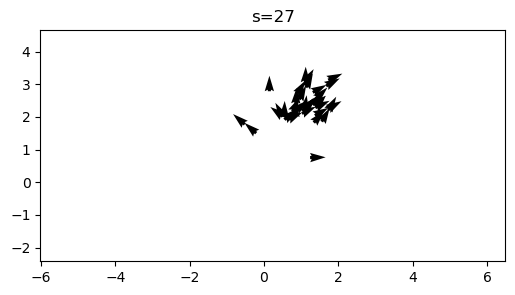

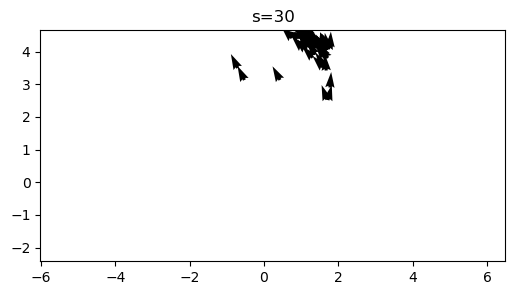

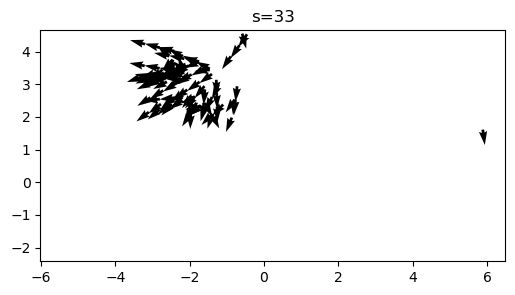

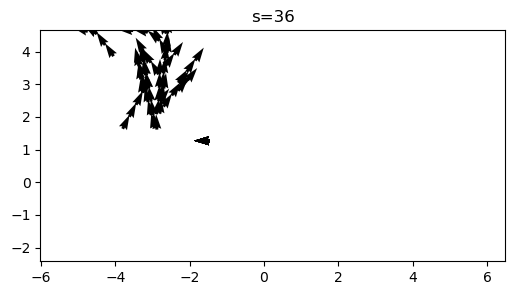

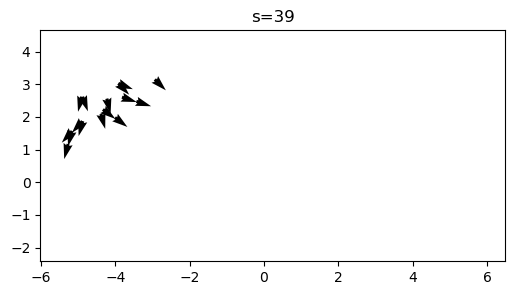

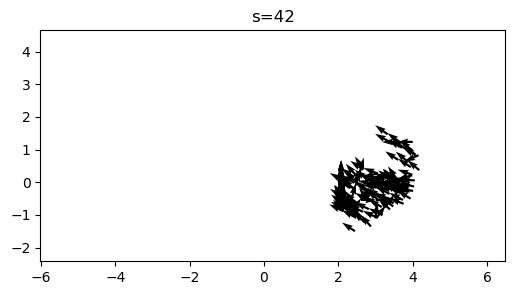

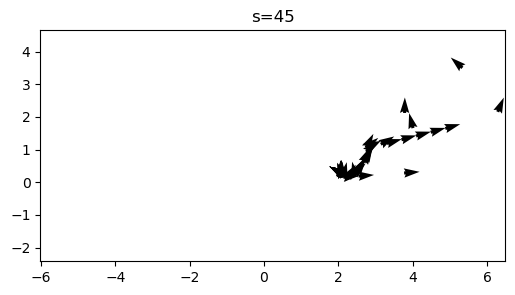

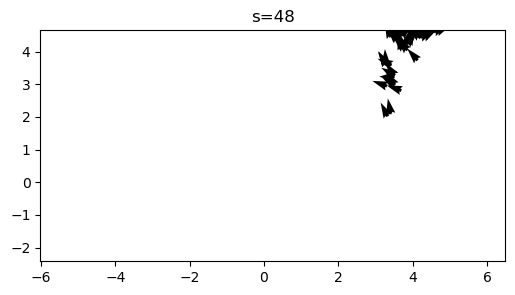

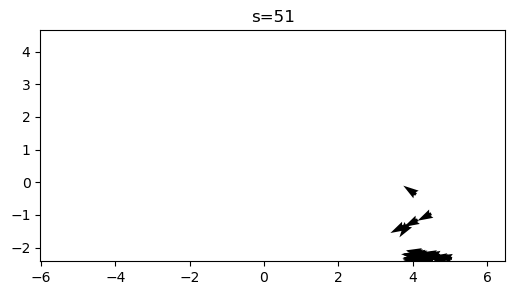

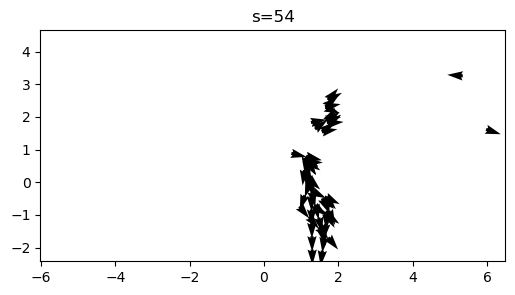

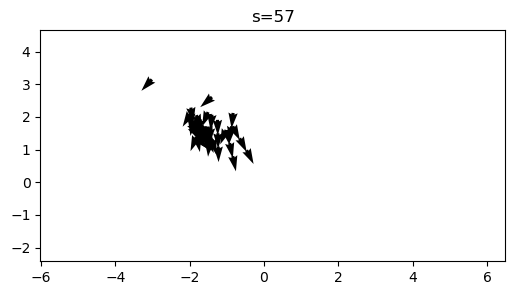

In [7]:


inds = np.arange(0, len(unis), 3)
for i in range(inds.shape[0]):
    if i == 20:
        break
    ind = inds[i]
    s_each = unis[ind]
    mask = s == s_each
    fig, ax = plt.subplots(figsize=(6, 3))
    # ax.scatter(x[mask], y[mask])
    ax.quiver(x[mask], y[mask], np.cos(a[mask]), np.sin(a[mask]), scale=30)
    ax.set_xlim(*xrang)
    ax.set_ylim(*yrang)
    ax.set_title('s=%d'%(s_each))